In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

### 3. Dimensionality Reduction

In [2]:
data = pd.read_csv('../data/Metabolic_data_2.csv')

In [3]:
X = data.drop(['Diagnosis','Sample ID'], axis=1)
y = data['Diagnosis']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
clf = make_pipeline(PCA(random_state = 42), RandomForestClassifier(random_state=42))
param_distrib = { "pca__n_components": np.arange(10, 80),
                    "randomforestclassifier__n_estimators": np.arange(50, 500)}
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3, random_state = 73)
rnd_search.fit(X_train[:10000], y_train[:10000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=73)

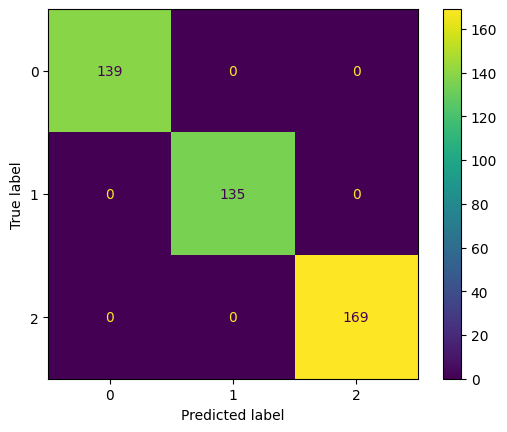

In [5]:
y_pred = rnd_search.predict((X_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

In [6]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': 254, 'pca__n_components': 40}

In [7]:
from sklearn.decomposition import FastICA

# Applying ICA
ica = FastICA(n_components=2, random_state=0)  # Using 2 components for visualization
independent_components = ica.fit_transform(X)

# Creating a DataFrame for the independent components
ica_df = pd.DataFrame(data=independent_components, columns=['Independent Component 1', 'Independent Component 2'])

# Adding back the diagnosis information for visualization
ica_df['Diagnosis'] = data['Diagnosis']

ica_df.head()


,Independent Component 1,Independent Component 2,Diagnosis
0,0.836497,-0.844763,0
1,0.820846,0.823829,1
2,0.544054,-1.077403,0
3,-1.186042,-0.971131,2
4,-1.322598,-0.274600,2


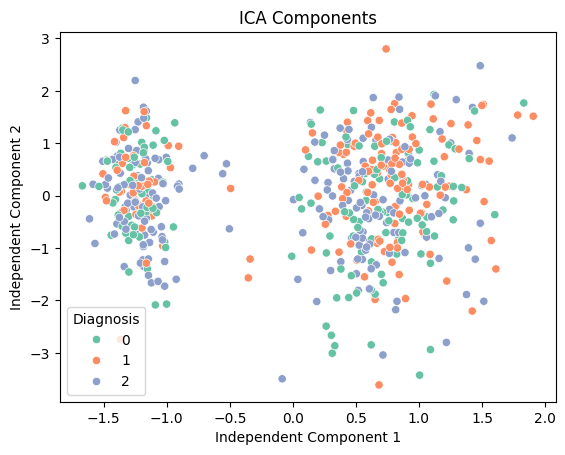

In [8]:
#plot the independent components
sns.scatterplot(data=ica_df, x='Independent Component 1', y='Independent Component 2', hue='Diagnosis', palette='Set2')
plt.title('ICA Components')
plt.show()

In [9]:
from sklearn.decomposition import FastICA
from sklearn.metrics import mutual_info_score
import numpy as np
import matplotlib.pyplot as plt

def average_mutual_information(components):
    n = components.shape[1]
    total_mi = 0
    count = 0
    for i in range(n):
        for j in range(i + 1, n):
            mi = mutual_info_score(components[:, i], components[:, j])
            total_mi += mi
            count += 1
    return total_mi / count

components_range = range(2, 21)
mi_scores = []

from sklearn.preprocessing import KBinsDiscretizer

def discretize_components(components):
    discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=200000)
    return discretizer.fit_transform(components)

for n_components in components_range:
    ica = FastICA(n_components=n_components, random_state=0, max_iter=1000, tol=0.001)
    components = ica.fit_transform(X)
    discrete_components = discretize_components(components)
    mi_score = average_mutual_information(discrete_components)
    mi_scores.append(mi_score)


/home/fathinah.izzati/miniconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/fathinah.izzati/miniconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/fathinah.izzati/miniconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/fathinah.izzati/miniconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/fathinah.izzati/miniconda3/lib/python3.11/site-packages/sklearn/decomp

Text(0.5, 1.0, 'MI score for different n components')

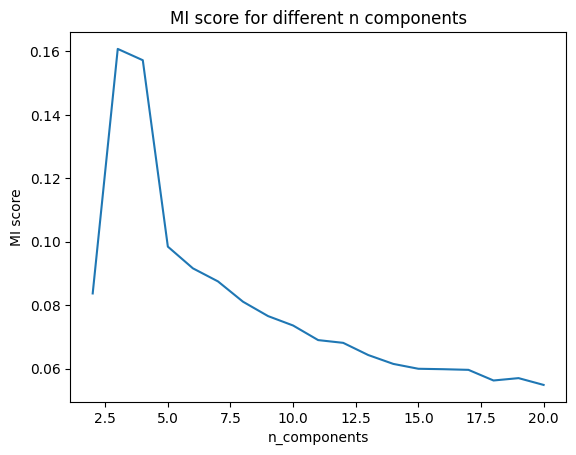

In [10]:
plt.plot( components_range, mi_scores)
plt.xlabel('n_components')
plt.ylabel('MI score')
plt.title('MI score for different n components')

In [11]:
mi_scores

[0.08371557296687773,
 0.1607697544544836,
 0.15720844860023106,
 0.09846918523675269,
 0.09162995810944168,
 0.08751725675528498,
 0.08111263614395277,
 0.07658312107950425,
 0.07361464945231021,
 0.06901715564064904,
 0.06814890569285766,
 0.06430789403793366,
 0.06151438056191396,
 0.059982917414588104,
 0.059844607541622616,
 0.05964312329431713,
 0.05628892023555326,
 0.05703335901746616,
 0.05489253918751154]

In [12]:
## N_components = 6